# EDA

# 0.0 IMPORTS

In [1]:
from bs4 import BeautifulSoup
import requests
import time
import random
import pandas as pd
from datetime import datetime
import os
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display      import HTML
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
jupyter_settings()

import warnings
warnings.filterwarnings("ignore")

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/home/tc0019/anaconda3/envs/olx_env/lib/python3.9/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['random', 'datetime']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


## 0.1 Load Data

In [2]:
df_metadados_final = pd.read_csv("/home/tc0019/DS/car_price_prediction/data/raw/df_metadados_final.csv")
cols=['Unnamed: 0']
df_metadados_final.drop(cols,axis=1,inplace=True)
df_metadados_final.columns

Index(['ID', 'TITULO', 'UF', 'Ano', 'KM', 'CAMBIO', 'COMBUSTIVEL',
       'VALOR_LIMPO', 'VALOR_LIMPO_LOG', 'KM_LOG', 'ANO_LOG', 'automático',
       'manual', 'semi-automático', 'diesel', 'elétrico', 'flex', 'gasolina',
       'gásnatural', 'híbrido', 'álcool'],
      dtype='object')

# Train test Split

In [3]:
# feature selection
drop_colunas_x = ['ID', 'TITULO', 'UF','CAMBIO', 'COMBUSTIVEL','VALOR_LIMPO','VALOR_LIMPO_LOG','manual','álcool','híbrido','gásnatural','elétrico','semi-automático']
dados_modelo = df_metadados_final.copy()

## The selection will a dataset with log variables and another with original variables
# log variables
x_log=dados_modelo.drop(columns=drop_colunas_x+['KM', 'Ano'])
y_log=dados_modelo.VALOR_LIMPO_LOG

# original variables
x=dados_modelo.drop(columns=drop_colunas_x+['KM_LOG', 'ANO_LOG'])
y=dados_modelo.VALOR_LIMPO

# ORIGINAL
x_treino, x_teste,y_treino,y_teste = train_test_split(x,y,test_size=.2,random_state=1234)
# LOG
x_treino_log, x_teste_log,y_treino_log,y_teste_log = train_test_split(x_log,y_log,test_size=.2,random_state=1234)

x_treino.columns,x_treino_log.columns

(Index(['Ano', 'KM', 'automático', 'diesel', 'flex', 'gasolina'], dtype='object'),
 Index(['KM_LOG', 'ANO_LOG', 'automático', 'diesel', 'flex', 'gasolina'], dtype='object'))

# Models

In [4]:
## METRIC(R²)
resultados = []

## models with original values
lr = LinearRegression().fit(x_treino,y_treino)
resultados.append( ('lr',lr.score(x_teste,y_teste)) )

## models with log values
lr_log = LinearRegression().fit(x_treino_log,y_treino_log)
resultados.append( ('lr_log',lr_log.score(x_teste_log,y_teste_log)) )

In [5]:
## models with original values
dtr = DecisionTreeRegressor().fit(x_treino,y_treino)
resultados.append( ('dtr',dtr.score(x_teste,y_teste)) )

## models with log values
dtr_log = DecisionTreeRegressor().fit(x_treino_log,y_treino_log)
resultados.append( ('dtr_log',dtr_log.score(x_teste_log,y_teste_log)))

## Feature Importance
# pd.DataFrame(index=x_treino.columns,data=dtr.feature_importances_,columns=['VALOR']).sort_values('VALOR').plot(kind='bar')
# pd.DataFrame(index=x_treino_log.columns,data=dtr_log.feature_importances_,columns=['VALOR']).sort_values('VALOR').plot(kind='bar')


In [6]:
## models with original values
rfr = RandomForestRegressor().fit(x_treino,y_treino)
resultados.append( ('rfr',rfr.score(x_teste,y_teste)) )

## models with log values
rfr_log = RandomForestRegressor().fit(x_treino_log,y_treino_log)
resultados.append( ('rfr_log',rfr_log.score(x_teste_log,y_teste_log)))

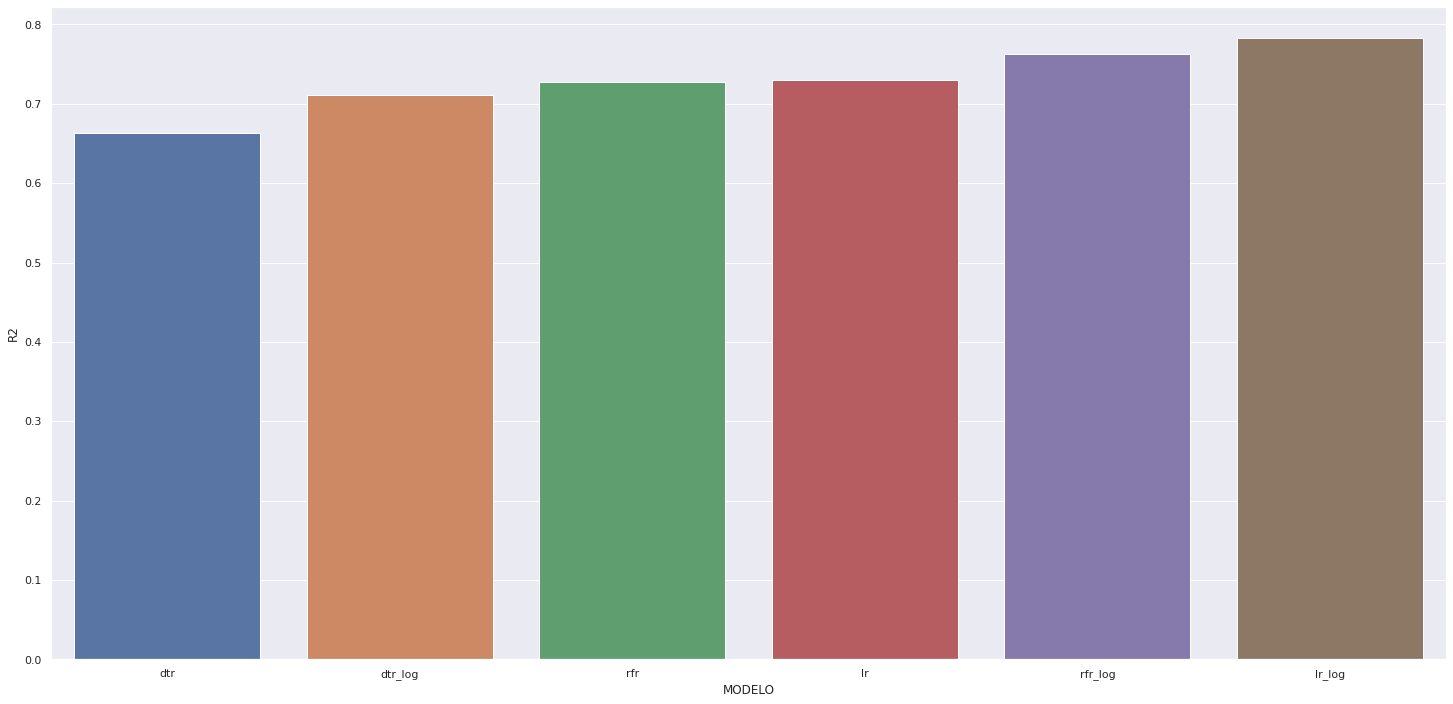

In [7]:
## DF with (R²) results
df_resultados = pd.DataFrame(resultados,columns=['MODELO','R2'])

sns.barplot(x='MODELO',y='R2',data = df_resultados.sort_values('R2'));

In [8]:
resultados

[('lr', 0.7302910192151862),
 ('lr_log', 0.7826903565998731),
 ('dtr', 0.6625640325858653),
 ('dtr_log', 0.7116044216588557),
 ('rfr', 0.7277782393329937),
 ('rfr_log', 0.7632061154854106)]

In [9]:
i = 150
modelo_final = LinearRegression()
modelo_final.fit(x_treino_log,y_treino_log)

index = range(len(x_teste_log[:i]))

pred = modelo_final.predict(x_teste_log[:i])
pred[:10]

array([12.12196847, 11.58011715, 11.5799883 , 11.12116874, 10.38259951,
       10.38524235, 10.83303516, 11.49025306, 11.19490698, 11.22034515])

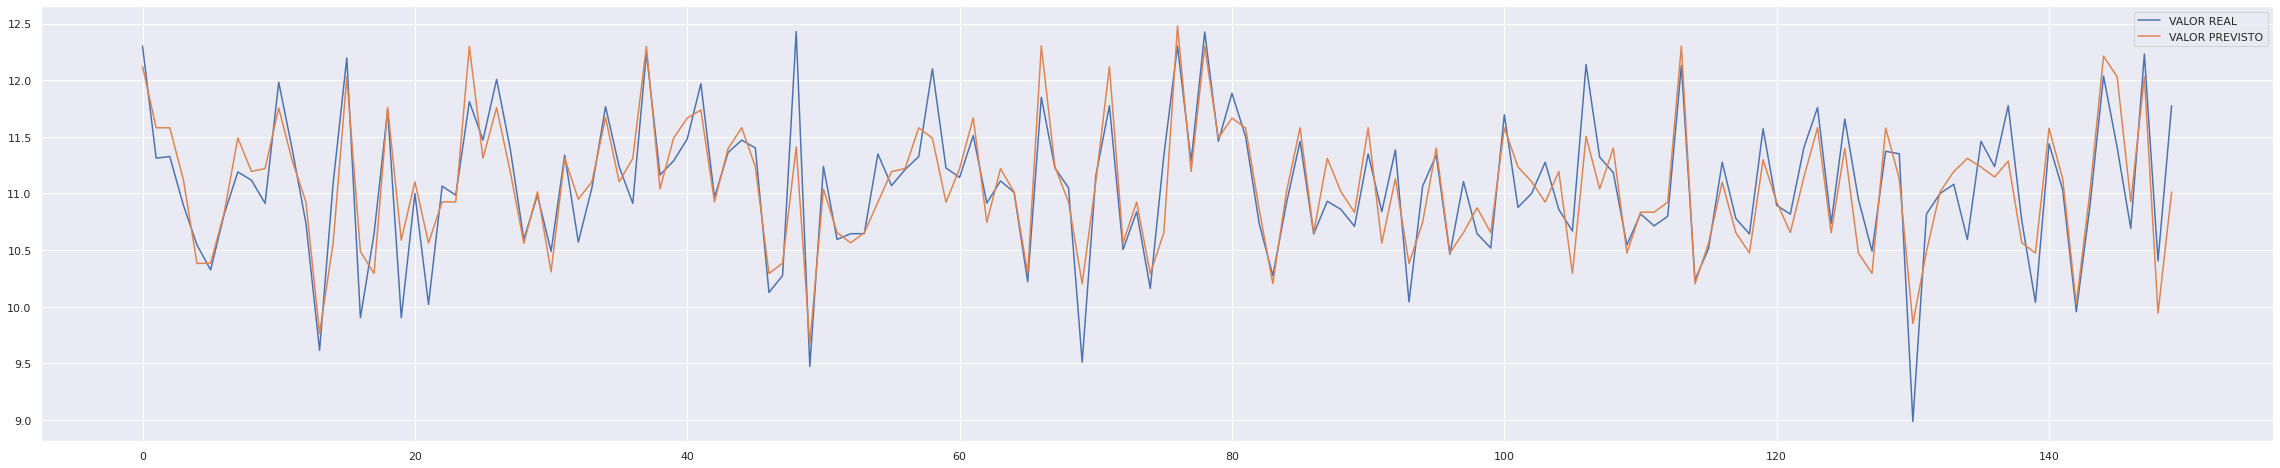

In [10]:
plt.figure(figsize=(40, 8))
plt.plot(index, y_teste_log[:i],label='real')
plt.plot(index, pred,label='previsto')
plt.legend(['VALOR REAL','VALOR PREVISTO']);

In [11]:
for x in zip(pred[:10], np.exp(pred)[:10]):
  print(f"VALOR LOG: {x[0]} - VALOR NORMAL: {round(x[1])}")

VALOR LOG: 12.12196846999359 - VALOR NORMAL: 183867
VALOR LOG: 11.580117145036184 - VALOR NORMAL: 106950
VALOR LOG: 11.579988303828259 - VALOR NORMAL: 106936
VALOR LOG: 11.121168737892049 - VALOR NORMAL: 67587
VALOR LOG: 10.382599513840205 - VALOR NORMAL: 32293
VALOR LOG: 10.385242348426345 - VALOR NORMAL: 32378
VALOR LOG: 10.833035162213037 - VALOR NORMAL: 50667
VALOR LOG: 11.490253057766495 - VALOR NORMAL: 97758
VALOR LOG: 11.194906975374352 - VALOR NORMAL: 72759
VALOR LOG: 11.220345149565901 - VALOR NORMAL: 74634


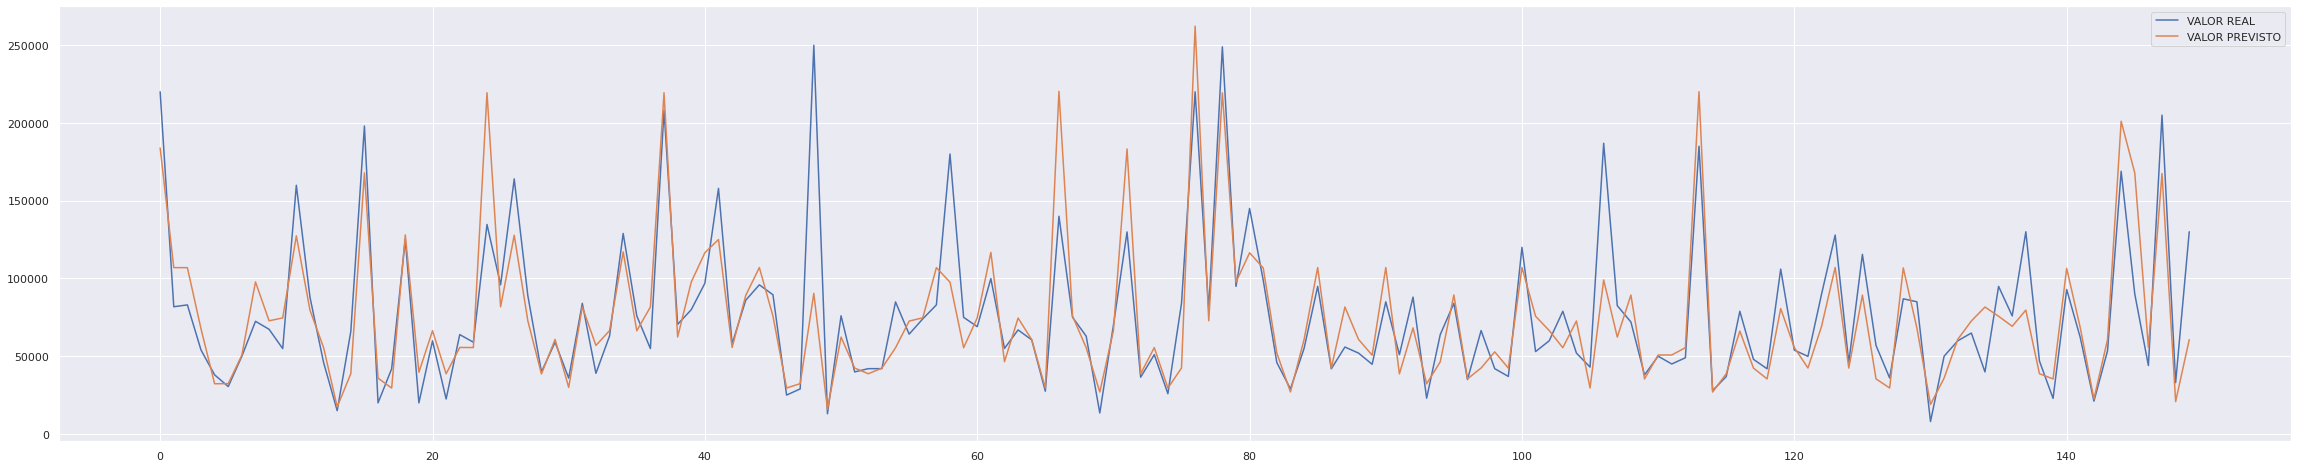

In [12]:
plt.figure(figsize=(40, 8))
plt.plot(index, np.exp(y_teste_log[:i]),label='real')
plt.plot(index, np.exp(pred),label='previsto')
plt.legend(['VALOR REAL','VALOR PREVISTO']);

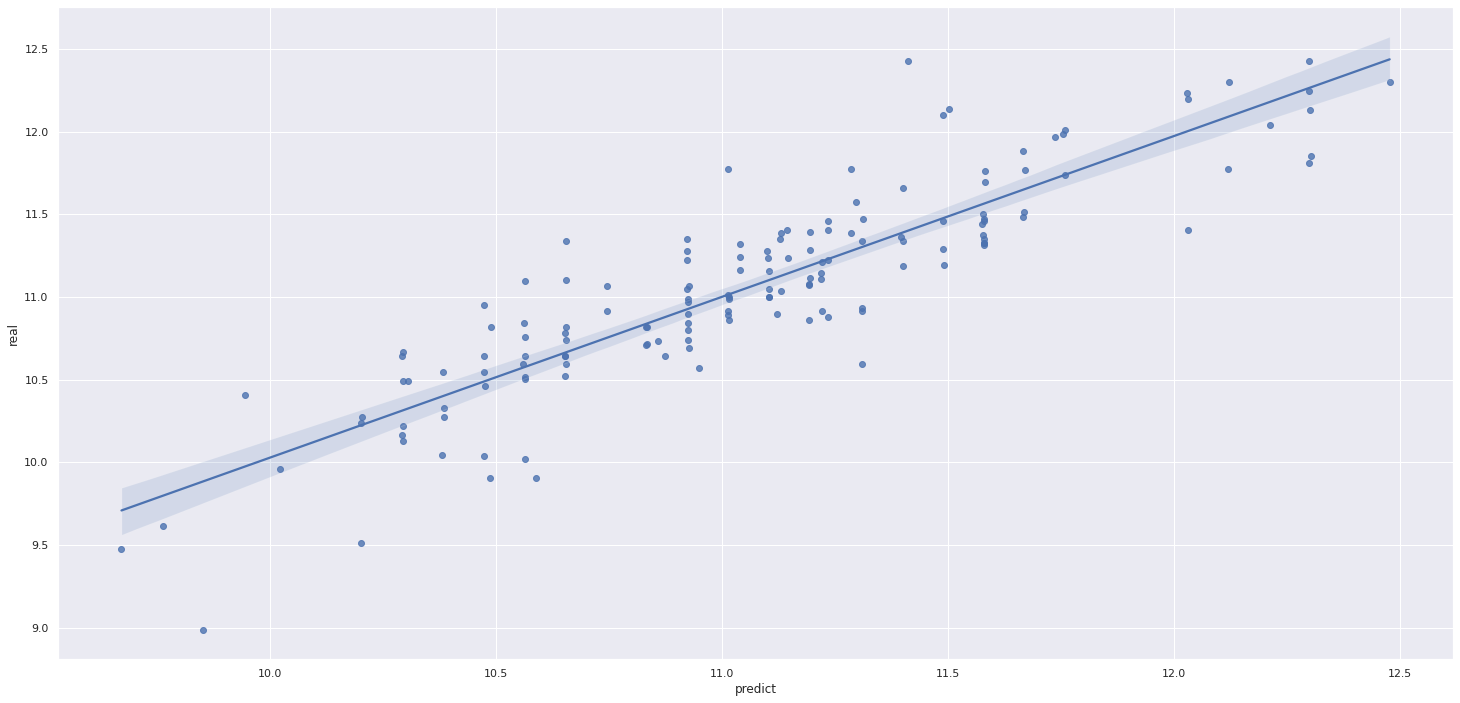

In [13]:
i = 150
pred = modelo_final.predict(x_teste_log[:i])

sns.regplot(x=pred,y=y_teste_log[:i])

plt.xlabel('predict')
plt.ylabel('real');

MELHORIAS QUE PODEM SER FEITAS (TRABALHOS FUTUROS)
testar a combinação de outras variáveis explicativas (X), por exemplo, retirar KM já que tem uma correlação alta com ANO
tratar melhor os valores outlier em ANO, KM e VALOR
principalmente outlier em relação a cada ano, por exemplo, há veículos antigos, antes de 2005, que tem valores acima de 100k, isso pode estar prejudicando o modelo.
extrair infos da coluna TÍTULO e inserir como variáveis explicativa (X)
coletar os anúncios completos com outras infos dos automóveis, por exemplo, marca, modelo, cor etc.

In [14]:
import joblib as jb

modelo_final = LinearRegression()
modelo_final.fit(x_treino_log,y_treino_log)
modelo_final.score(x_teste_log,y_teste_log)

modelo = modelo_final
description="""modelo Regressão Linear para prever valores de automóveis. 
Foi utilizado a normalização LOG nas variáveis KM e ANO. \
Foram utilizadas as seguintes colunas: """ + " ','".join(x_log.columns)
date='29/06/2022'
version='0.1'
name_model='20220629_previsao_precos_automoveis'
metrics = {'r2': 0.78538}

dic_save_model = dict({
    'model': modelo,
    'metadata': {
        'description': description,
        'author': 'Djalma Junior',
        'date': date,
        'source_code_version': version,
        'metrics': metrics
    }
})
dic_save_model

jb.dump(dic_save_model, name_model+'.joblib')

name_model='20220629_previsao_precos_automoveis'
arquivo_modelo = jb.load(name_model+'.joblib')
arquivo_modelo

{'model': LinearRegression(),
 'metadata': {'description': "modelo Regressão Linear para prever valores de automóveis. \nFoi utilizado a normalização LOG nas variáveis KM e ANO. Foram utilizadas as seguintes colunas: KM_LOG ','ANO_LOG ','automático ','diesel ','flex ','gasolina",
  'author': 'Djalma Junior',
  'date': '29/06/2022',
  'source_code_version': '0.1',
  'metrics': {'r2': 0.78538}}}

In [15]:
modelo_precos = arquivo_modelo['model']
modelo_precos

metrica = arquivo_modelo['metadata']['metrics']['r2']
metrica

def main():
  ANO = float(input('=> Qual ano do seu veículo? '))
  KM  = float(input('=> Qual a KM do seu veículo? '))
  AUTOMAT  = 1 if input('=> Seu carro é automático? (S/N) ').upper() == 'S' else 0
  DIESEL   = 1 if input('=> Seu carro é diesel? (S/N) ').upper()  == 'S' else 0
  FLEX     = 1 if input('=> Seu carro é flex? (S/N) ').upper()  == 'S' else 0
  GASOLINA = 1 if input('=> Seu carro é gasolina? (S/N) ').upper()  == 'S' else 0

  KM  = np.log(KM) if KM > 0 else 0
  ANO = np.log(ANO) if ANO > 0 else 0

  dados = np.array([[KM,ANO,AUTOMAT,DIESEL, FLEX , GASOLINA]])
  
  valor_previsto = round(np.exp(modelo_precos.predict(dados)[0]))

  print(f"\n==> O seu veículo custa aproximadamente R${valor_previsto}")

  print(f"\n**Indice de acerto de {round(metrica*100,2)}%**")

In [16]:
main()